NATURE OF THE DATA
- Predictive task “Will a person buy the deposit?” --> supervised ML
1. Classification
2. Regression

In [64]:
import pandas as pd

bank_data_set = pd.read_csv('Data/bank-additional/bank-additional/bank-additional-full.csv', delimiter=";")
    # csv ist getrennt mit
print(bank_data_set.index)
bank_data_set.describe(include='all')

RangeIndex(start=0, stop=41188, step=1)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [65]:
# Checking for missing values in the entire dataset
missing_values = bank_data_set.isnull().sum()

# Checking for missing values in each column
missing_values_per_column = bank_data_set.isnull().sum(axis=0)

# Checking for missing values in each row
missing_values_per_row = bank_data_set.isnull().sum(axis=1)

# Displaying the results
print("Missing values in the entire dataset:")
print(missing_values)

print("\nMissing values per column:")
print(missing_values_per_column)

print("\nMissing values per row:")
print(missing_values_per_row)

Missing values in the entire dataset:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Missing values per row:
0        0
1        0
2        0
3        0

--> No missing values in dataset

In [66]:
bank_data_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Distribution of class variables:
Look into the class distribution to see if it is a balanced data or not

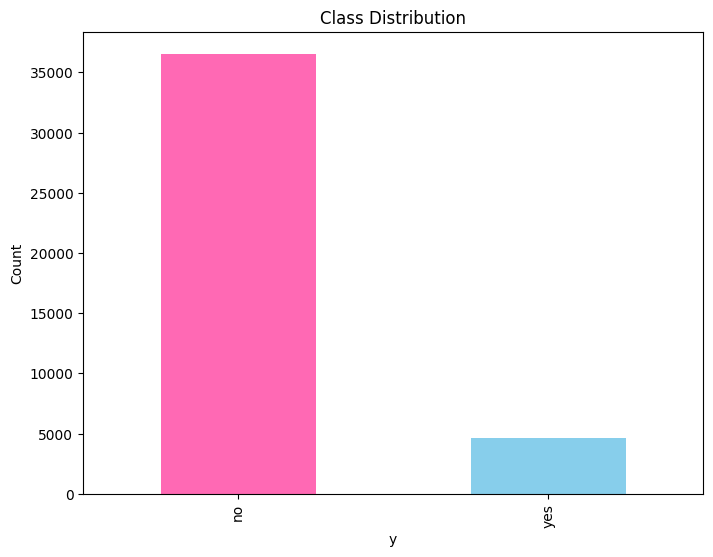

In [67]:
import matplotlib.pyplot as plt

class_distribution = bank_data_set['y'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['hotpink', 'skyblue'])

plt.title('Class Distribution')
plt.xlabel('y')
plt.ylabel('Count')

plt.show()


--> Dataset is imbalanced
--> failure class is close to 8 times the number of success class

Analysis of Categorical variables
1. Job
2. Marital Status
3. Housing Loan
4. outcome of the previous marketing campaign (poutcome)
6. day of week
7. education

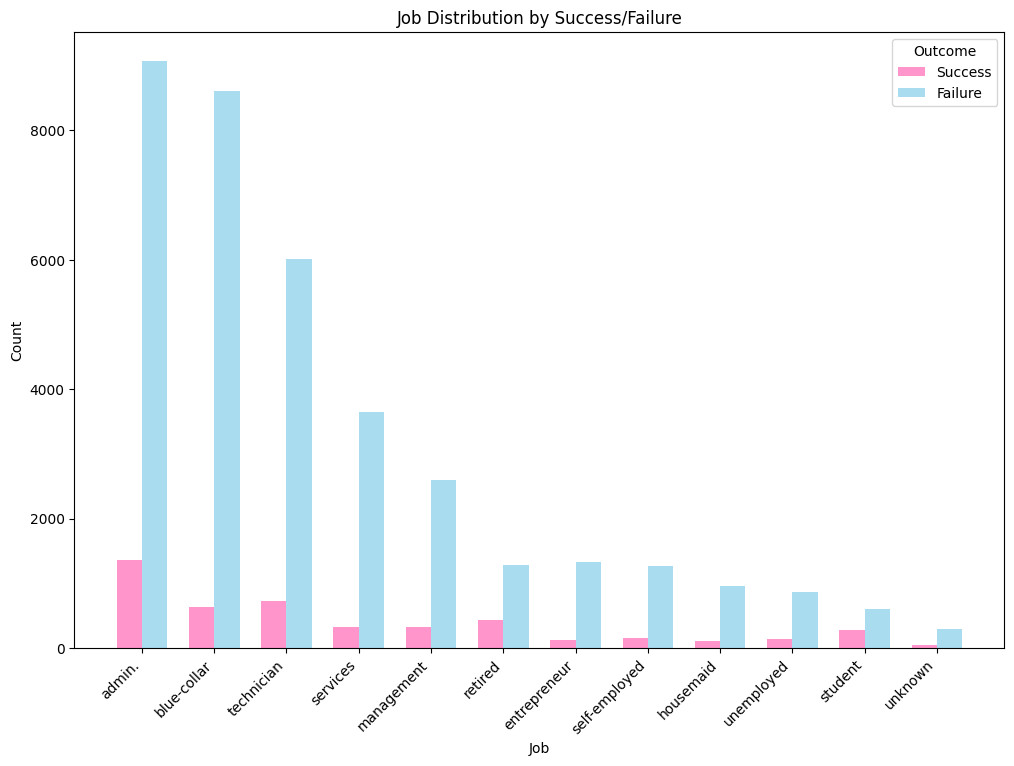

In [95]:
# Create separate DataFrames for success and failure
success_data = bank_data_set[bank_data_set['y'] == 'yes']
failure_data = bank_data_set[bank_data_set['y'] == 'no']

# Get unique job categories
job_categories = bank_data_set['job'].value_counts().index

# Initialize subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Width of the bars
bar_width = 0.35

# Index for the x-axis positions
indices = range(len(job_categories))

# Plot bars for success and failure side by side
success_bars = ax.bar(indices, [success_data[success_data['job'] == job_category].shape[0] for job_category in job_categories], 
                      width=bar_width, color='hotpink', alpha=0.7, label='Success')

failure_bars = ax.bar([i + bar_width for i in indices], [failure_data[failure_data['job'] == job_category].shape[0] for job_category in job_categories], 
                      width=bar_width, color='skyblue', alpha=0.7, label='Failure')

# Set plot properties
ax.set_title('Job Distribution by Success/Failure')
ax.set_xlabel('Job')
ax.set_ylabel('Count')
ax.set_xticks([i + bar_width/2 for i in indices])
ax.set_xticklabels(job_categories, rotation=45, ha='right')

# Add legend
ax.legend(title='Outcome', loc='upper right', labels=['Success', 'Failure'])

plt.show()

--> More customers working as admin than any other profession
--> for each job failure is way higher than success

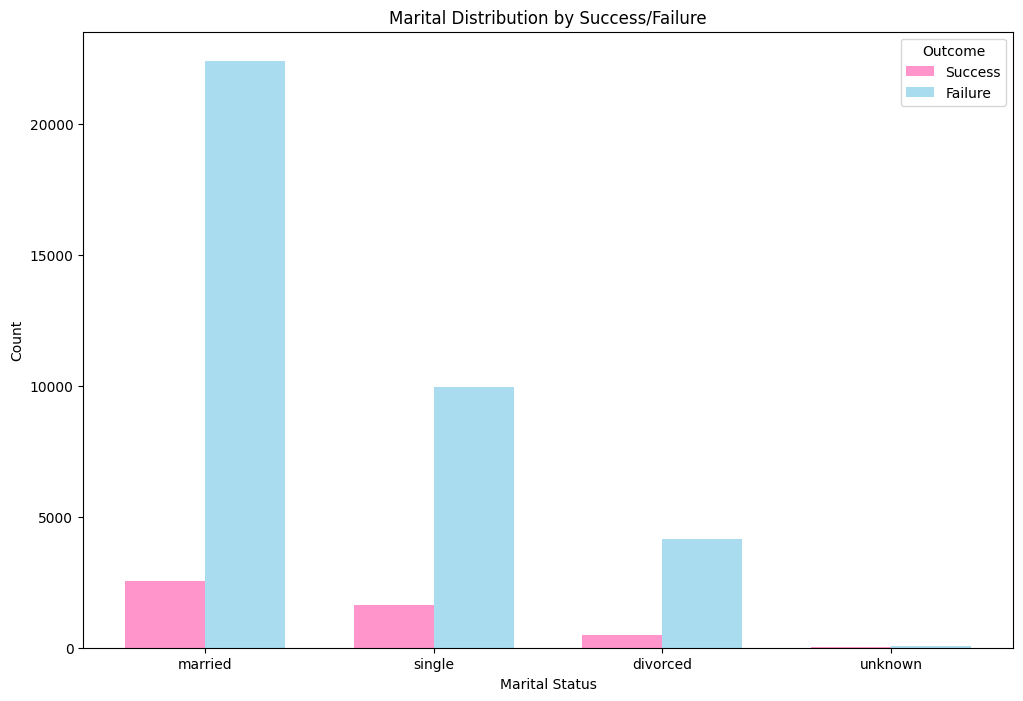

In [69]:
# Create separate DataFrames for success and failure
success_data = bank_data_set[bank_data_set['y'] == 'yes']
failure_data = bank_data_set[bank_data_set['y'] == 'no']

# Get unique marital categories
marital_categories = bank_data_set['marital'].value_counts().index

# Initialize subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Width of the bars
bar_width = 0.35

# Index for the x-axis positions
indices = range(len(marital_categories))

# Plot bars for success and failure side by side
success_bars = ax.bar(indices, [success_data[success_data['marital'] == marital_category].shape[0] for marital_category in marital_categories], 
                      width=bar_width, color='hotpink', alpha=0.7, label='Success')

failure_bars = ax.bar([i + bar_width for i in indices], [failure_data[failure_data['marital'] == marital_category].shape[0] for marital_category in marital_categories], 
                      width=bar_width, color='skyblue', alpha=0.7, label='Failure')

# Set plot properties
ax.set_title('Marital Distribution by Success/Failure')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
ax.set_xticks([i + bar_width/2 for i in indices])
ax.set_xticklabels(marital_categories)

# Add legend
ax.legend(title='Outcome', loc='upper right', labels=['Success', 'Failure'])

plt.show()

--> Majority of the customers are married. Followed by Single, divorced and unknown

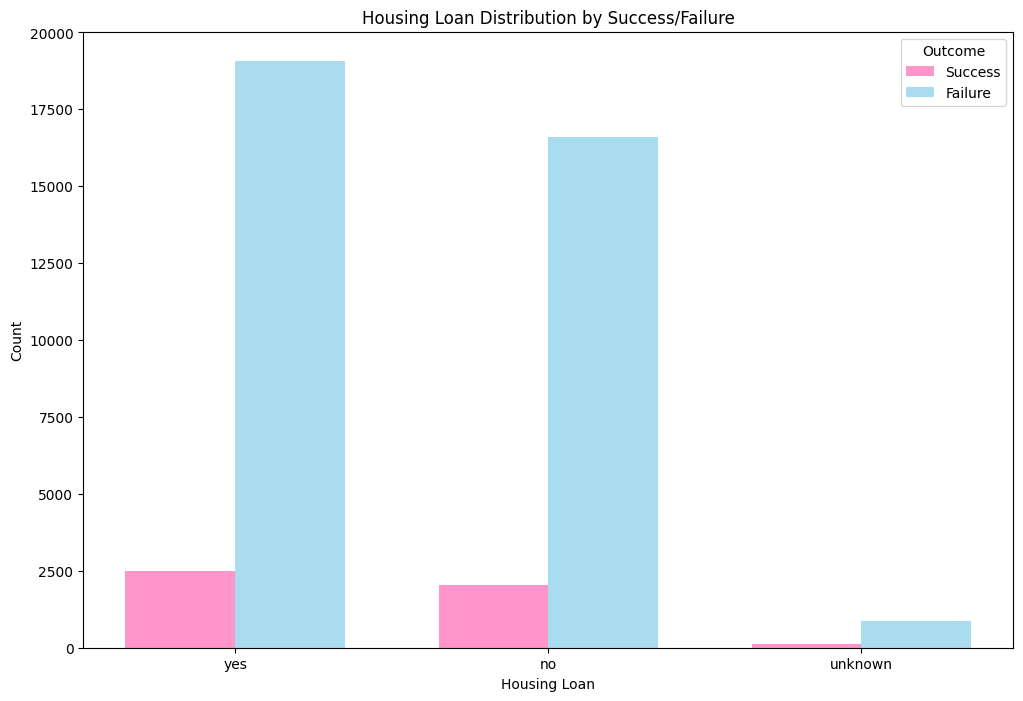

In [70]:
# Create separate DataFrames for success and failure
success_data = bank_data_set[bank_data_set['y'] == 'yes']
failure_data = bank_data_set[bank_data_set['y'] == 'no']

# Get unique housing categories
housing_categories = bank_data_set['housing'].value_counts().index

# Initialize subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Width of the bars
bar_width = 0.35

# Index for the x-axis positions
indices = range(len(housing_categories))

# Plot bars for success and failure side by side
success_bars = ax.bar(indices, [success_data[success_data['housing'] == housing_category].shape[0] for housing_category in housing_categories], 
                      width=bar_width, color='hotpink', alpha=0.7, label='Success')

failure_bars = ax.bar([i + bar_width for i in indices], [failure_data[failure_data['housing'] == housing_category].shape[0] for housing_category in housing_categories], 
                      width=bar_width, color='skyblue', alpha=0.7, label='Failure')

# Set plot properties
ax.set_title('Housing Loan Distribution by Success/Failure')
ax.set_xlabel('Housing Loan')
ax.set_ylabel('Count')
ax.set_xticks([i + bar_width/2 for i in indices])
ax.set_xticklabels(housing_categories)

# Add legend
ax.legend(title='Outcome', loc='upper right', labels=['Success', 'Failure'])

plt.show()

--> Majority of the customers have a housing loan

--> For most of the customers, the previous marketing campaign outcome does not exist (Most of the customers are new customers who have not been contacted earlier)
--> Customers who had a successful outcome from the previous campaign, majority of those customers did subscribe for a term deposit
--> Assumption, that this feature may hold some value in predicting the target variable (especially poutcome_success category)

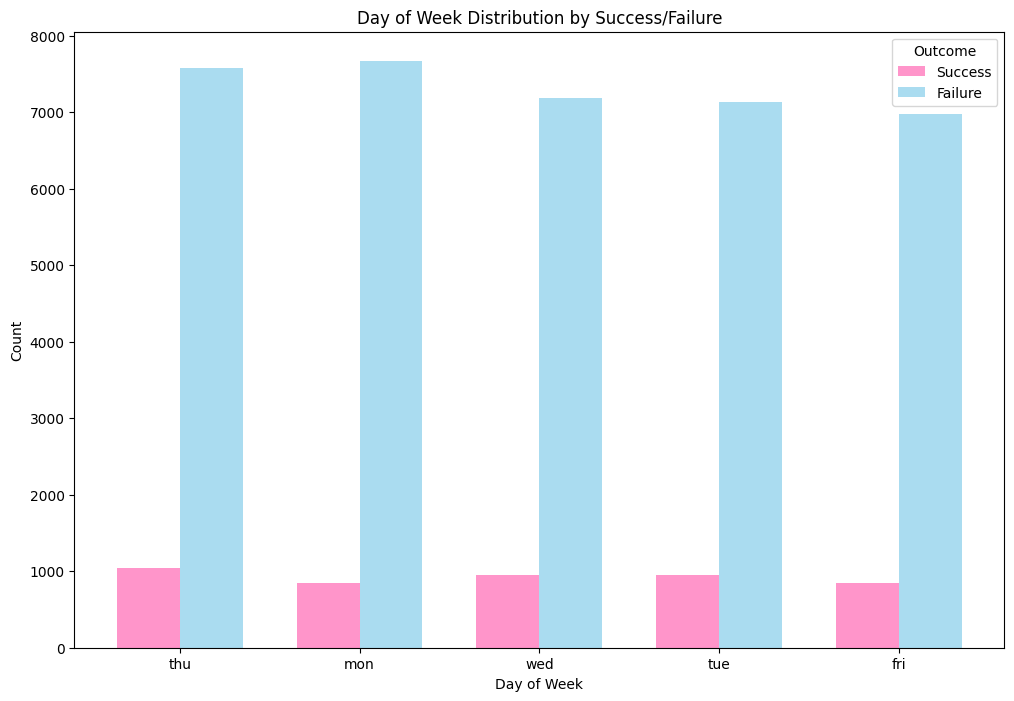

In [72]:
# Create separate DataFrames for success and failure
success_data = bank_data_set[bank_data_set['y'] == 'yes']
failure_data = bank_data_set[bank_data_set['y'] == 'no']

# Get unique day_of_week categories
day_of_week_categories = bank_data_set['day_of_week'].value_counts().index

# Initialize subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Width of the bars
bar_width = 0.35

# Index for the x-axis positions
indices = range(len(day_of_week_categories))

# Plot bars for success and failure side by side
success_bars = ax.bar(indices, [success_data[success_data['day_of_week'] == day_of_week_category].shape[0] for day_of_week_category in day_of_week_categories], 
                      width=bar_width, color='hotpink', alpha=0.7, label='Success')

failure_bars = ax.bar([i + bar_width for i in indices], [failure_data[failure_data['day_of_week'] == day_of_week_category].shape[0] for day_of_week_category in day_of_week_categories], 
                      width=bar_width, color='skyblue', alpha=0.7, label='Failure')

# Set plot properties
ax.set_title('Day of Week Distribution by Success/Failure')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Count')
ax.set_xticks([i + bar_width/2 for i in indices])
ax.set_xticklabels(day_of_week_categories)

# Add legend
ax.legend(title='Outcome', loc='upper right', labels=['Success', 'Failure'])

plt.show()

--> Seems to be irrelevent as we have the same amount of data for all the days of the week, and no:yes ratio is also almost same

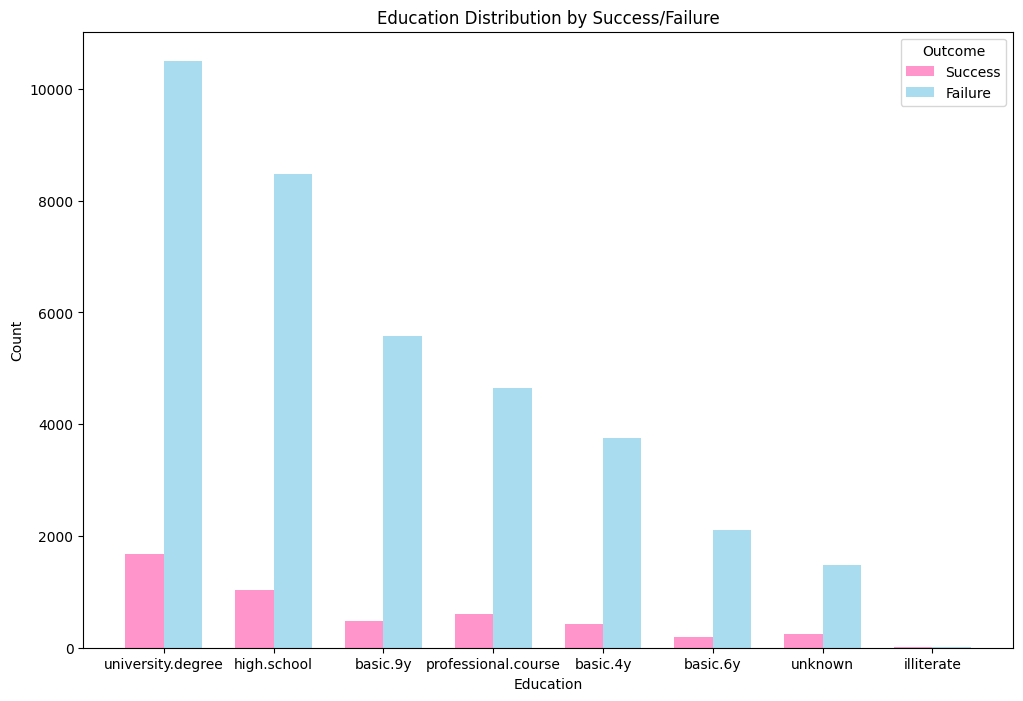

In [74]:
# Create separate DataFrames for success and failure
success_data = bank_data_set[bank_data_set['y'] == 'yes']
failure_data = bank_data_set[bank_data_set['y'] == 'no']

# Get unique education categories
education_categories = bank_data_set['education'].value_counts().index

# Initialize subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Width of the bars
bar_width = 0.35

# Index for the x-axis positions
indices = range(len(education_categories))

# Plot bars for success and failure side by side
success_bars = ax.bar(indices, [success_data[success_data['education'] == education_category].shape[0] for education_category in education_categories], 
                      width=bar_width, color='hotpink', alpha=0.7, label='Success')

failure_bars = ax.bar([i + bar_width for i in indices], [failure_data[failure_data['education'] == education_category].shape[0] for education_category in education_categories], 
                      width=bar_width, color='skyblue', alpha=0.7, label='Failure')

# Set plot properties
ax.set_title('Education Distribution by Success/Failure')
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_xticks([i + bar_width/2 for i in indices])
ax.set_xticklabels(education_categories)

# Add legend
ax.legend(title='Outcome', loc='upper right', labels=['Success', 'Failure'])

plt.show()

--> Most people in the data set have a university degree

Analysis of Numerical features:
1. Age
2. Duration (Of the last contact, in seconds)
    --> Not include in our final models, as we want to create a realistic predictive model
    --> But implementation of a basic model with the duration feature just to see how much of an impact this feature makes
3. euribor3m (denotes the basic rate of interest used in lending between banks on the European Union interbank market)

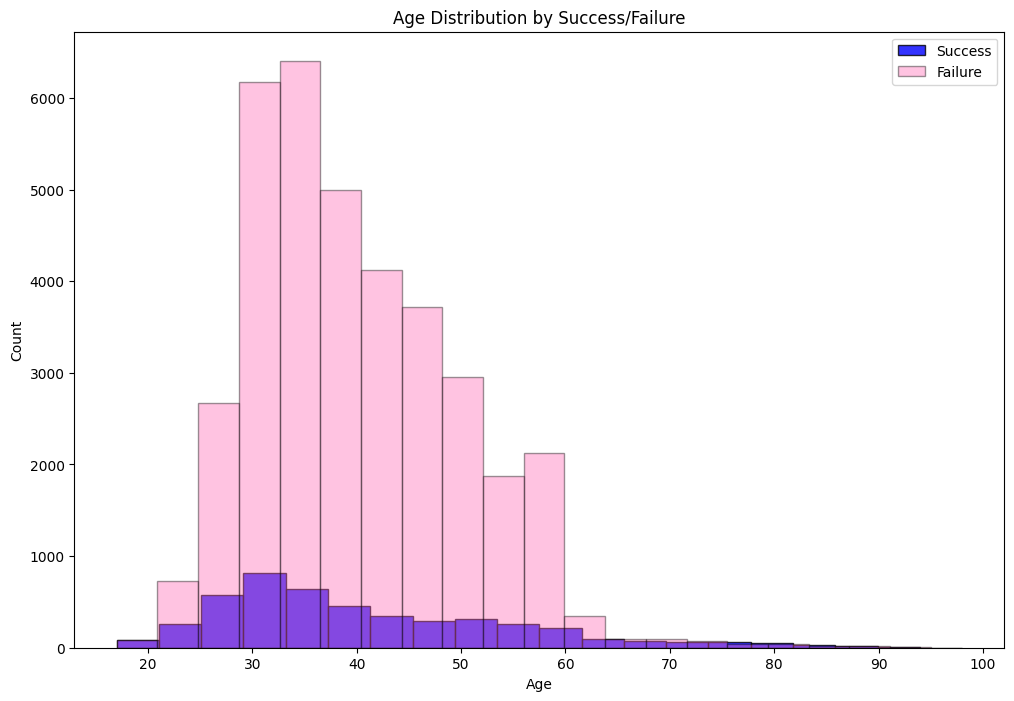

The mean age for people who subscribed is: 40.91 years
The mean age for people who did not subscribe is: 39.91 years


In [90]:
# AGE Distribution

# Create separate DataFrames for success and failure
success_data = bank_data_set[bank_data_set['y'] == 'yes']
failure_data = bank_data_set[bank_data_set['y'] == 'no']

# Plot the age histograms for success and failure
plt.figure(figsize=(12, 8))

plt.hist(success_data['age'], bins=20, alpha=0.8, label='Success', color='blue', edgecolor='black')
plt.hist(failure_data['age'], bins=20, alpha=0.4, label='Failure', color='hotpink', edgecolor='black')

plt.title('Age Distribution by Success/Failure')
plt.xlabel('Age')
plt.ylabel('Count')

# Add legend
plt.legend()

plt.show()

# Calculate the mean age for people who subscribed
mean_age_success = success_data['age'].mean()

# Calculate the mean age for people who did not subscribe
mean_age_failure = failure_data['age'].mean()

print(f'The mean age for people who subscribed is: {mean_age_success:.2f} years')
print(f'The mean age for people who did not subscribe is: {mean_age_failure:.2f} years')


--> Customers that subscibed or didn’t subscribe a term deposit have a median age of around 40
--> Age isn’t necessarily a good indicator for which customer will subscribe and which customer will not

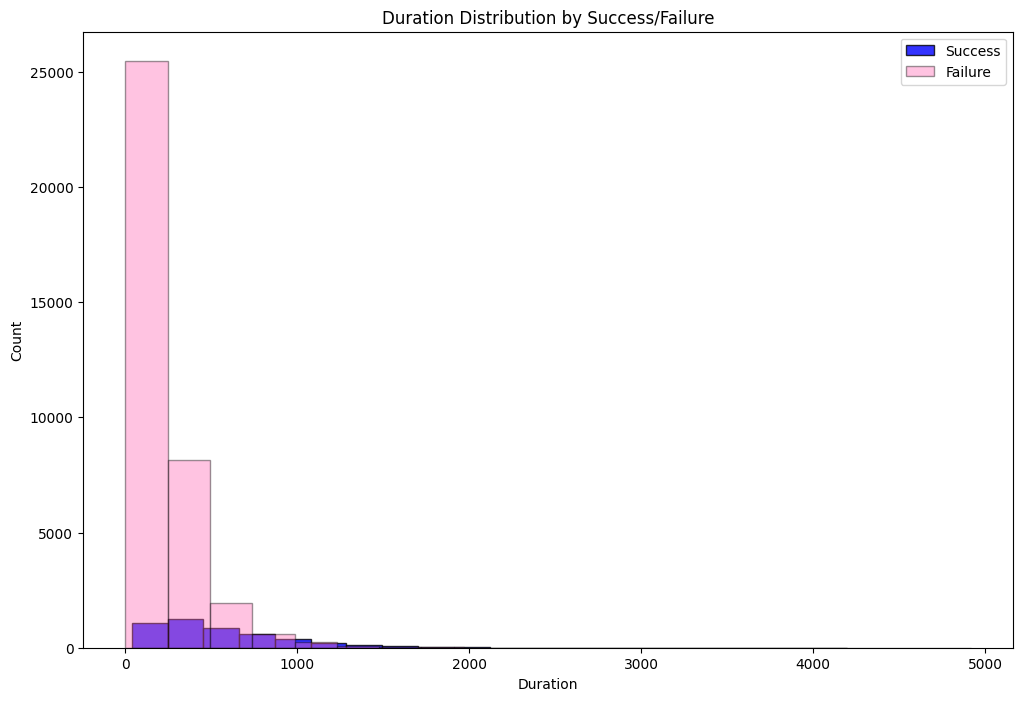

The mean duration for people who subscribed is: 553.19 sec
The mean duration for people who did not subscribe is: 220.84 sec


In [91]:
# DURATION Distribution

# Create separate DataFrames for success and failure
success_data = bank_data_set[bank_data_set['y'] == 'yes']
failure_data = bank_data_set[bank_data_set['y'] == 'no']

# Plot the duration histograms for success and failure
plt.figure(figsize=(12, 8))

plt.hist(success_data['duration'], bins=20, alpha=0.8, label='Success', color='blue', edgecolor='black')
plt.hist(failure_data['duration'], bins=20, alpha=0.4, label='Failure', color='hotpink', edgecolor='black')

plt.title('Duration Distribution by Success/Failure')
plt.xlabel('Duration')
plt.ylabel('Count')

# Add legend
plt.legend()

plt.show()

# Calculate the mean duration for people who subscribed
mean_duration_success = success_data['duration'].mean()

# Calculate the mean duration for people who did not subscribe
mean_duration_failure = failure_data['duration'].mean()

print(f'The mean duration for people who subscribed is: {mean_duration_success:.2f} sec')
print(f'The mean duration for people who did not subscribe is: {mean_duration_failure:.2f} sec')

--> Last contact duration of a customer can be useful for predicting the target variable
--> Expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes

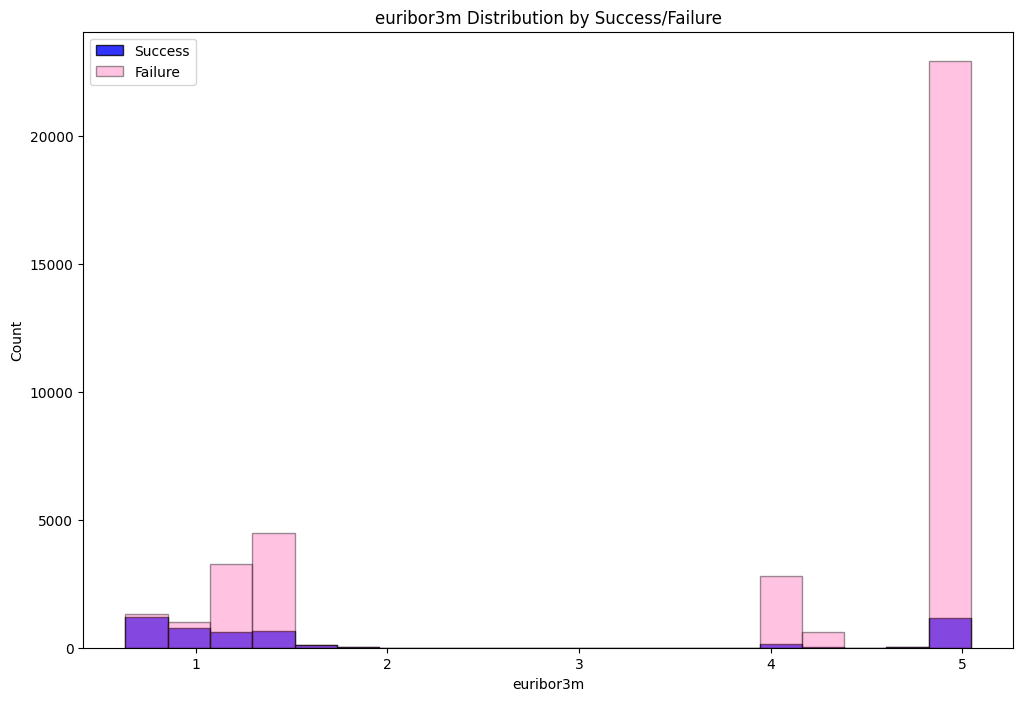

In [92]:
# EURIBOR3M Distribution

# Welche Darstellungsweise würde sich hier besser anbieten??

# Create separate DataFrames for success and failure
success_data = bank_data_set[bank_data_set['y'] == 'yes']
failure_data = bank_data_set[bank_data_set['y'] == 'no']

# Plot the euribor3m histograms for success and failure
plt.figure(figsize=(12, 8))

plt.hist(success_data['euribor3m'], bins=20, alpha=0.8, label='Success', color='blue', edgecolor='black')
plt.hist(failure_data['euribor3m'], bins=20, alpha=0.4, label='Failure', color='hotpink', edgecolor='black')

plt.title('euribor3m Distribution by Success/Failure')
plt.xlabel('euribor3m')
plt.ylabel('Count')

# Add legend
plt.legend()

plt.show()

--> Difference in median for both the classes
--> Indicates that the feature can be very useful for our case study
--> But we can validate the assumption only by applying models and extracting feature importance